Packages

In [1]:
import numpy as np
np.__version__

'1.14.3'

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os
import re
import operator
from collections import Counter
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# visualization
import matplotlib.pyplot as plt

# magic command
%matplotlib inline

Paths

In [3]:
os.getcwd() # can help to obtain the good paths 

'/Users/laks/Desktop/Polytechnique/Cours/Datacamp Capgemini (MAP540)/Day5'

In [4]:
path_to_google_vectors = ''
path_to_plots = ''

## Load  Data

In [5]:
data1 = pd.read_csv('comments_lemmentized.csv', sep=";", index_col = 0)

In [6]:
data = pd.read_csv('clean_data_group_4.csv')

In [7]:
data['Stemming']

0       ['premier', 'sejour', 'center', 'parc', 'adore...
1       ['sejour', 'tres', 'agreable', 'comme', 'habit...
2       ['cottage', 'tres', 'bien', 'propre', 'chaud',...
3       ['sejour', 'tres', 'reposant', 'noter', 'trois...
4       ['arrive', 'trois', 'nuits', 'deux', 'jours', ...
5       ['center', 'parc', 'endroit', 'tres', 'relaxan...
6       ['agreablement', 'surpris', 'super', 'sejour',...
7       ['piscine', 'bondee', 'monde', 'pourtant', 'ho...
8       ['personnel', 'service', 'client', 'hauteur', ...
9       ['vrai', 'paradis', 'deconnecter', 'travail', ...
10      ['jours', 'detente', 'famille', 'niveau', 'l a...
11      ['tres', 'beau', 'cadre', 'harmonie', 'natured...
12      ['sejour', 'tres', 'agreable', 'tres', 'bon', ...
13      ['parc', 'calme', 'nature', 'partout', 'cottag...
14      ['tres', 'bonnes', 'installation', 'seul', 'be...
15      ['venus', 'famille', 'amie', 'enfants', 'faire...
16      ['passe', 'tres', 'bon', 'sejour', ' environne...
17      ['cott

In [8]:
# the lemmantized_reviews are interpreted as a string by the read_csv command. We convert it into a list. 
data['Stemming'] = data['Stemming'].str.replace(r"[\[\]\']", "").str.split(", ")
data.head()

,Unnamed: 0,hotel_name,published_date,rating,review,review_language,title,trip_date,tokens,Stemming,Lemmatisation
0,0,Center Parcs Le Bois aux Daims,1 février 2019,5,Premier séjour à center parc pour nous et nous...,fr,Petite semaine en famille,janvier 2019,"['premier', 'sejour', 'center', 'parc', 'adore...","[premier, sejour, center, parc, adore, partis,...","['premi', 'sejour', 'cent', 'parc', 'ador', 'p..."
1,1,Center Parcs Le Bois aux Daims,1 février 2019,5,sejour très agreable comme d habitude a center...,fr,center parcs la promesse des daims,janvier 2019,"['sejour', 'tres', 'agreable', 'comme', 'habit...","[sejour, tres, agreable, comme, habitude, cent...","['sejour', 'tre', 'agreabl', 'comm', 'habitud'..."
2,2,Center Parcs Le Bois aux Daims,1 février 2019,3,"Cottage très bien, propre et chaud dès l'arriv...",fr,A améliorer,janvier 2019,"['cottage', 'tres', 'bien', 'propre', 'chaud',...","[cottage, tres, bien, propre, chaud, de, l arr...","['cottag', 'tre', 'bien', 'propr', 'chaud', 'd..."
3,3,Center Parcs Le Bois aux Daims,1 février 2019,3,Séjour très reposant à noter tout de même troi...,fr,Reposant,février 2019,"['sejour', 'tres', 'reposant', 'noter', 'trois...","[sejour, tres, reposant, noter, trois, restaur...","['sejour', 'tre', 'repos', 'not', 'trois', 're..."
4,4,Center Parcs Le Bois aux Daims,2 février 2019,5,Arrivés pour trois nuits et deux jours en sema...,fr,tres belle decouverte,janvier 2019,"['arrives', 'trois', 'nuits', 'deux', 'jours',...","[arrive, trois, nuits, deux, jours, semaine, h...","['arriv', 'trois', 'nuit', 'deux', 'jour', 'se..."


In [9]:
data['Stemming'][0] # checking if it's a list

['premier',
 'sejour',
 'center',
 'parc',
 'adore',
 'partis',
 'jours',
 'petite',
 'fille',
 'an',
 'parfait',
 'cottage',
 'premuim',
 'tres',
 'bien',
 'agence',
 'cocoon',
 'propre',
 'activites',
 'piscine',
 'spectacle',
 'enfants',
 'balade',
 'daims',
 'geniales',
 'deconnecter',
 'pense',
 'sortir',
 'livraisons',
 'repas',
 'carrefour',
 'market',
 '   ']

In [10]:
list_stop_words = ["good", "great", "one", "nt", "u2013", "", "would", "get", "center", "parcs","the","le"
                   ," u00e0","nous","with","what","for","etait","not","the","une","de","pour","plus","zip","under","but","tr u00e0","   ",
                  'n\'t','...','\'ve','\'re', 'ã\x9dou', "''", 'avez','est','être','être.on','le','les','de','et','la','pour','très','à',
                'en','a','des','pas','dans','du','au','avec','sont','que','avons','de','et','pour'
                ,'nous','un','est','en','des','pas','dans','du','au','avec','-\\taqua','-\\ten','-\\tle','farfelues.moi','\\u2764','amp','dis','\\u00bc',
               'tré','tres','-\\tpas','-\\tla','1m01','cafetière\\u2026','une','tout','mais','qui','il','sur',"c'est",'ne','plus','ce','se',
               'aux','je','peu','vraiment','par','vous','fait','faire','était','car','ou','quot','si','sans','tous','aussi','fois','n','ans','entre','peut',
               'semaine','faut','voir','3','eu','cela','ont','nos','4','même','nos','contre','donc','surtour','son','reste','séjour','site','rapport',
                'surtout','quand','2','sommes','sinon','vu','jours','assez','autres','\u00e7a','ménage',"n'est",'toujours','soit','c','l','malgré','comme',
                'niveau','toutes','non','avions','toute','\u00e7a','mon','moins','passer','devant','où',"c est","trop"," u00e7a","parc","daims","cottage",
                   "sejour","etre","mundo","rien",'aqua',"bois","cottages","passe","l aqua","d activites","n'est","j'ai",'avant','apres','ils','alors',
                   'trouve','deja',"qu il",'dit','vaut','enfin','quoi','ceux','cela','c']
def remove_stop_word(x, list_stop_words=list_stop_words):
    clean_x = [l for l in x if l not in list_stop_words]
    return clean_x
data['Stemming'] = data['Stemming'].apply(remove_stop_word)

In [11]:
cleaned_docs = list(data['Stemming'])

In [12]:
cleaned_docs

[['premier',
  'adore',
  'partis',
  'petite',
  'fille',
  'an',
  'parfait',
  'premuim',
  'bien',
  'agence',
  'cocoon',
  'propre',
  'activites',
  'piscine',
  'spectacle',
  'enfants',
  'balade',
  'geniales',
  'deconnecter',
  'pense',
  'sortir',
  'livraisons',
  'repas',
  'carrefour',
  'market'],
 ['agreable',
  'habitude',
  'quel',
  'plaisir',
  'terrasse',
  'eau',
  'mondo',
  'degres',
  'dedans',
  'penser',
  'descendre',
  'riviere',
  'sauvage'],
 ['bien',
  'propre',
  'chaud',
  'l arrivee',
  'agreable une',
  'coupure',
  'courant',
  'empeche',
  'profiter',
  'soiree',
  'depart nous',
  'basse',
  'saison',
  'l eau',
  'piscines',
  'chaude'],
 ['reposant',
  'noter',
  'trois',
  'restaurant',
  'testis',
  'quatre',
  'trois',
  'deception',
  'quick',
  'reussi',
  'sandwich',
  'chaud',
  'cette',
  'ampleur',
  'innadmissible',
  'avoir',
  'bloquee',
  'dome',
  'presque',
  'heure',
  'resto',
  'cause',
  'coupure',
  'electricite',
  'due',


## Use word2vec considering our dataset vocabulary

In [13]:
my_q = 300 # to match dim of GNews word vectors
mcount = 5 # minimal word frequency  

w2v = Word2Vec(size = my_q, min_count = mcount)
w2v.build_vocab(cleaned_docs)

Load Google vectors corresponding to our vocabulary

In [14]:
w2v.intersect_word2vec_format(path_to_google_vectors + 'GoogleNews-vectors-negative300.bin', binary = True)
# or 'GoogleNews-vectors-negative300.bin.gz'

In [15]:
w2v['bien'].shape

(300,)

In [16]:
def my_vector_getter(word, wv) :
    # returns the vector of a word
    try:
        # we use reshape because cosine similarity in sklearn now works only for multidimensional arrays
        word_array = wv[word].reshape(1,-1)
        return word_array
    except KeyError:
        print('word: <', word, '> not in vocabulary!')

In [17]:
my_vector_getter('bien', w2v).shape

(1, 300)

Let's look for a word missing from our vocabulary

In [18]:
my_vector_getter('eagle', w2v)

word: < eagle > not in vocabulary!


Some (cosine) similarities examples :

print(w2v.similarity('sejour', 'bien'))
print(w2v.similarity('vaisselle', 'sale'))
print(w2v.similarity('sejour', 'dommage'))
print(w2v.similarity('service', 'bien'))

Let's return the most similar words !

In [19]:
w2v.similar_by_word('dommage')

[('laisse', 0.7623937129974365),
 ('venir', 0.7439148426055908),
 ('veux', 0.7430702447891235),
 ('faisant', 0.7417432069778442),
 ('vrai', 0.7397091388702393),
 ('sujet', 0.7383036017417908),
 ('meilleurs', 0.7378333806991577),
 ('mieux', 0.7364397644996643),
 ('peux', 0.7363690137863159),
 ('prochaine', 0.7361836433410645)]

In [20]:
w2v.similar_by_word('sale')

[('disposition', 0.3294093608856201),
 ('market', 0.3096266984939575),
 ('business', 0.2822806239128113),
 ('commercial', 0.2656724452972412),
 ('tranche', 0.25971436500549316),
 ('installation', 0.25135281682014465),
 ('delivery', 0.24051645398139954),
 ('plat', 0.238859161734581),
 ('premium', 0.23870377242565155),
 ('coupon', 0.2310352921485901)]

In [35]:
w2v.similar_by_word('doute')

[('sujet', 0.7587375640869141),
 ('approche', 0.7471460103988647),
 ('souvent', 0.7469475269317627),
 ('meilleurs', 0.7463781833648682),
 ('viennent', 0.7441918849945068),
 ('meilleur', 0.7425336241722107),
 ('mettre', 0.7413569688796997),
 ('personnes', 0.7377133369445801),
 ('prochaine', 0.7371463775634766),
 ('finalement', 0.7366708517074585)]

What are analogies found for the vector v = w2v['hotel'] - w2v['bed'] ?

In [22]:
w2v.most_similar(positive = ['sejour'], negative = ['bien'])

[('fenetres', 0.17899179458618164),
 ('fa u00e7on', 0.17736971378326416),
 ('odeur', 0.1721271425485611),
 ('expliquer', 0.161915123462677),
 ('allons', 0.155351459980011),
 ('drap', 0.15067872405052185),
 ('malgres', 0.14651593565940857),
 ('parfaite', 0.14492672681808472),
 ('payantes', 0.14183537662029266),
 ('tyroliennes', 0.1391506791114807)]

### Visualize word embeddings of most frequents words

In [36]:
all_tokens = [token for sublist in cleaned_docs for token in sublist]
t_counts = dict(Counter(all_tokens))
len(t_counts)

12382

In [37]:
n_most_fqt = 200
sorted_t_counts = sorted(t_counts.items(), key = operator.itemgetter(1), reverse = True)
mft = [elt[0] for elt in sorted_t_counts[:n_most_fqt]]

In [38]:
mft

['bien',
 'enfants',
 'activites',
 'agreable',
 'famille',
 'prix',
 'piscine',
 'super',
 'bon',
 'personnel',
 'propre',
 'grand',
 'vip',
 'beaucoup',
 'top',
 'restaurant',
 'calme',
 'monde',
 'petit',
 'personnes',
 'nature',
 'toboggan',
 'dommage',
 'service',
 'dome',
 'petits',
 'qualite',
 'vacances',
 'moment',
 'sympa',
 'manque',
 'cher',
 'an',
 'n est',
 'riviere',
 'vaisselle',
 'point',
 'menage',
 'sauvage',
 'seul',
 'temp',
 'bemol',
 'bonne',
 'juste',
 'mal',
 'place',
 'jeux',
 'sale',
 'cette',
 'avoir',
 'velos',
 'velo',
 'terrasse',
 'beau',
 'animaux',
 'deux',
 'proprete',
 'j ai',
 'cote',
 'domaine',
 'endroit',
 'cuisine',
 'parfait',
 'voiture',
 'petite',
 'malgre',
 'hors',
 'profiter',
 'quelques',
 'magnifique',
 'encore',
 'arrivee',
 'aquatique',
 'cadre',
 'spa',
 'equipe',
 'reposant',
 'sou',
 'restauration',
 'c etait',
 'bref',
 'personne',
 'spacieux',
 'propose',
 'confort',
 'location',
 'confortable',
 'premium',
 'pense',
 'arrive',
 '

Store the vectors of the most frequent words in numpy array

In [39]:
mft_vecs = np.zeros((n_most_fqt, my_q))

for idx,token in enumerate(mft):
    mft_vecs[idx,:] = w2v[token]

In [40]:
mft_vecs.shape

(200, 300)

Visualizing Data using t-SNE :
-  Original article : http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
- Scikit-Learn documentation : https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

<Figure size 1440x720 with 0 Axes>

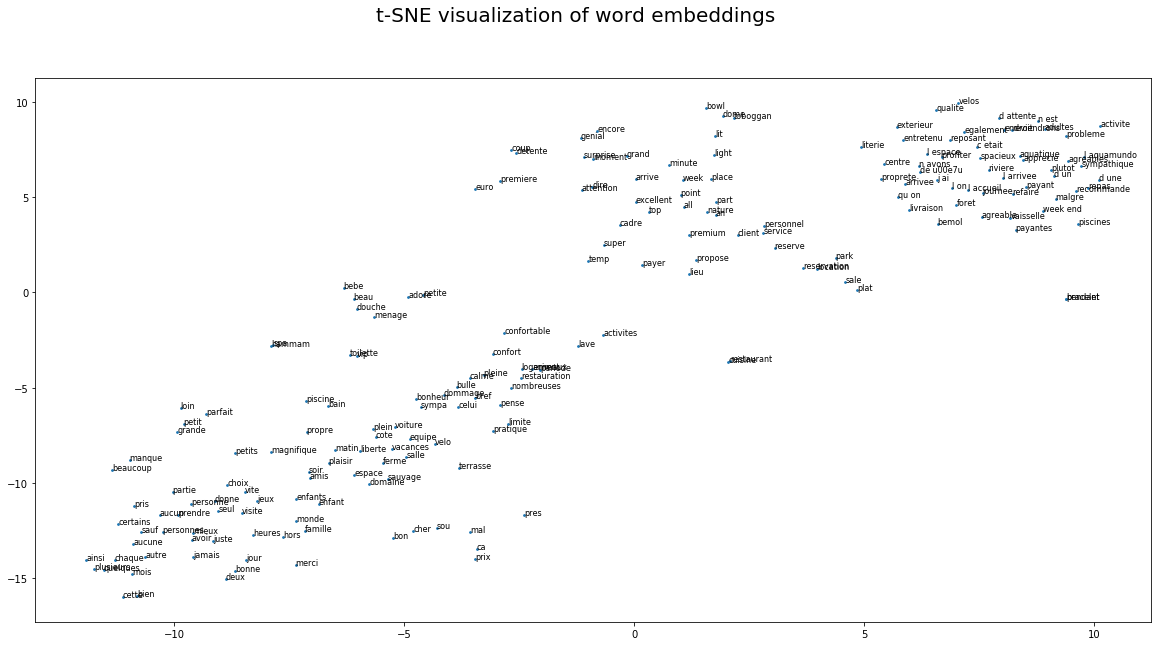

In [41]:
my_pca = PCA(n_components=10)
my_tsne = TSNE(n_components=2)

mft_vecs_pca = my_pca.fit_transform(mft_vecs)
mft_vecs_tsne = my_tsne.fit_transform(mft_vecs_pca)

plt.figure(figsize=(20, 10))
fig, ax = plt.subplots()
ax.scatter(mft_vecs_tsne[:,0], mft_vecs_tsne[:,1],s=3)
for x, y, token in zip(mft_vecs_tsne[:,0] , mft_vecs_tsne[:,1], mft):     
    ax.annotate(token, xy=(x, y), size=8)
fig.suptitle('t-SNE visualization of word embeddings',fontsize=20)
fig.set_size_inches(20,10)
fig.savefig(path_to_plots + 'word_embeddings.png',dpi=300)
fig.show()

## Use word2vec considering all Google word vectors
Let's compare !

In [29]:
wv_from_bin = KeyedVectors.load_word2vec_format(path_to_google_vectors + 'GoogleNews-vectors-negative300.bin', binary = True)

In [30]:
wv_from_bin.similar_by_word('coffee')

[('coffees', 0.721267819404602),
 ('gourmet_coffee', 0.7057086825370789),
 ('Coffee', 0.6900454759597778),
 ('o_joe', 0.6891065835952759),
 ('Starbucks_coffee', 0.6874972581863403),
 ('coffee_beans', 0.6749704480171204),
 ('latté', 0.664122462272644),
 ('cappuccino', 0.662549614906311),
 ('brewed_coffee', 0.6621608734130859),
 ('espresso', 0.6616826057434082)]

Running time is far longer but we can remark important differences among most similar words !
### Document similarity
In vector space ('bag-of-words' representation)

In [31]:
stpwds = stopwords.words('english')

In [32]:
s_1 = 'computer science is the study of the design and use of computers'
s_2 = 'programming language theory considers various approaches to the description of computation'

s_1 = [elt for elt in s_1.split(' ') if elt not in stpwds]
s_2 = [elt for elt in s_2.split(' ') if elt not in stpwds]

print(s_1)
print(s_2)

['computer', 'science', 'study', 'design', 'use', 'computers']
['programming', 'language', 'theory', 'considers', 'various', 'approaches', 'description', 'computation']


In [33]:
features = list(set(s_1).union(set(s_2)))

# project the two sentences in the vector space
p_1 = [1 if feature in s_1 else 0 for feature in features]
p_2 = [1 if feature in s_2 else 0 for feature in features]

p_1_print = list(zip(features, p_1))
p_2_print = list(zip(features, p_2))

print('=== vector space representation of sentence 1 : ===')
print(p_1_print, '\n')
print('=== vector space representation of sentence 2 : ===')
print(p_2_print, '\n')

print('similarity of sentences 1 and 2 in vector space:', 
      cosine_similarity(np.array(p_1).reshape(1,-1),np.array(p_2).reshape(1,-1)))

=== vector space representation of sentence 1 : ===
[('considers', 0), ('science', 1), ('computer', 1), ('language', 0), ('description', 0), ('various', 0), ('programming', 0), ('study', 1), ('use', 1), ('theory', 0), ('approaches', 0), ('design', 1), ('computers', 1), ('computation', 0)] 

=== vector space representation of sentence 2 : ===
[('considers', 1), ('science', 0), ('computer', 0), ('language', 1), ('description', 1), ('various', 1), ('programming', 1), ('study', 0), ('use', 0), ('theory', 1), ('approaches', 1), ('design', 0), ('computers', 0), ('computation', 1)] 

similarity of sentences 1 and 2 in vector space: [[0.]]


No similarity found in the vector space induced by bag-of-words representation !

In word embeddings space : naive document embeddings by word vector averaging :

In [35]:
p_1_embeddings = np.concatenate([wv_from_bin[token].reshape(1,-1) for token in s_1])
p_2_embeddings = np.concatenate([wv_from_bin[token].reshape(1,-1) for token in s_2])

# naive approach: centroids
centroid_1 = np.mean(p_1_embeddings, axis=0).reshape(1,-1)
centroid_2 = np.mean(p_2_embeddings, axis=0).reshape(1,-1)

print('similarity of centroids of sentences 1 and 2 in word embeddings space:', cosine_similarity(centroid_1, centroid_2))

similarity of centroids of sentences 1 and 2 in word embeddings space: [[0.4789528]]


It is already better !